In [1]:
import sys
import numpy as np
from astropy.io import fits
from astroscrappy import detect_cosmics
from matplotlib import pyplot as plt 
sys.path.append('aspired')

import twodspec

In [2]:
# Example data from SPRAT
# BLAP-09
sprat_data = fits.open('examples/v_e_20180704_32_1_0_2.fits')[0].data


aspired/twodspec.py:99: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


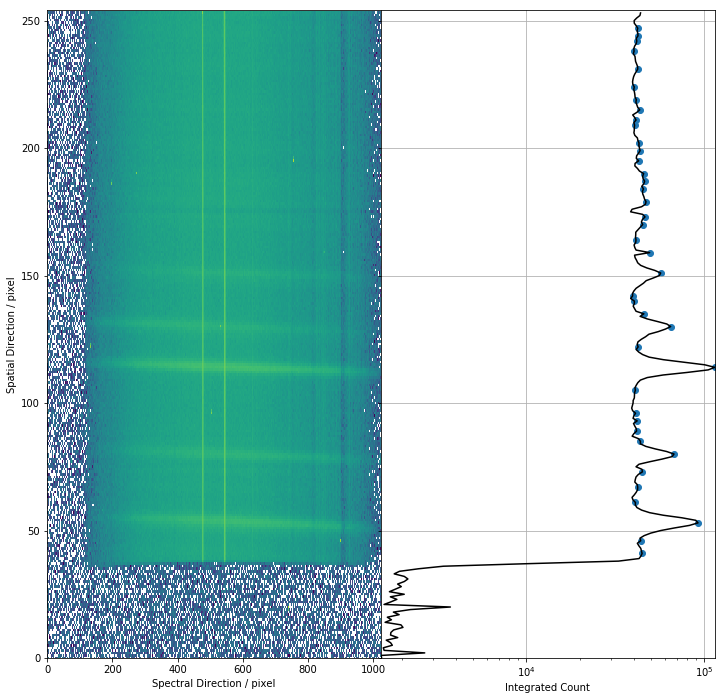

In [3]:
# (1) example of twodspec._find_peaks() without cosmic ray removal

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_data)[Waxis]
spatial_size = np.shape(sprat_data)[Saxis]

# the valid y-range of the chip (an array of int)
ydata = np.arange(spec_size)
ztot = np.sum(sprat_data, axis=Saxis)

peaks_y, heights_y = twodspec._find_peaks(sprat_data, spec_size, spatial_size, ydata, ztot, f_height=0.2, display=True)

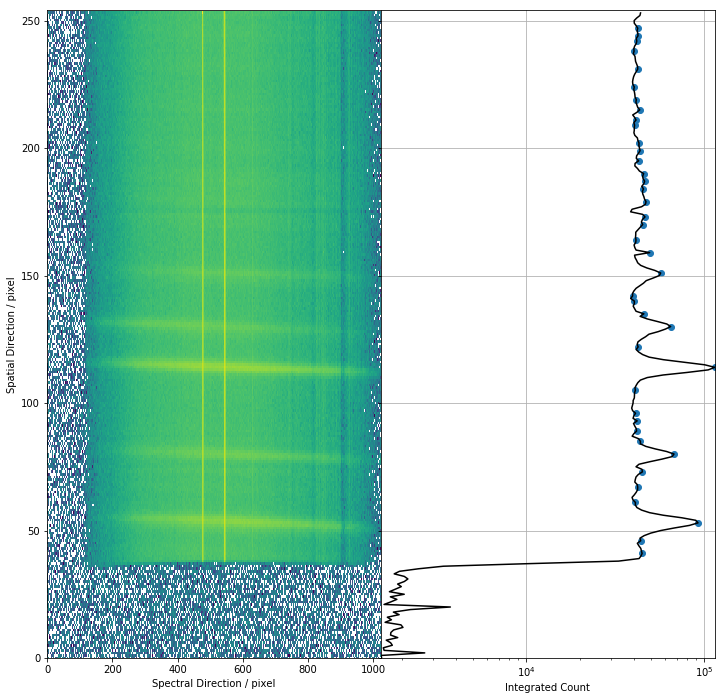

In [4]:
# (2) example of twodspec._find_peaks() with cosmic ray removal
peaks_y, heights_y = twodspec._find_peaks(detect_cosmics(sprat_data)[1], spec_size, spatial_size, ydata, ztot, f_height=0.2, display=True)

Tracing Aperture using nsteps=20


aspired/twodspec.py:267: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


Spectrum 1 : Trace gaussian width = [1.65976832 1.61241025 1.57036354 1.53961091 1.56590996 1.55228673
 1.52125858 1.49448863 1.51033411 1.43957594 1.40439294 1.41295747
 1.4218957  1.35680027 1.3740618  1.39576205 1.37863175 1.37729335
 1.31074096 0.        ] pixels
Spectrum 2 : Trace gaussian width = [2.19712787 2.02006392 1.68856085 1.7348216  1.69326891 1.67485637
 1.66824778 1.64998257 1.67915649 1.63739311 1.63519378 1.63446235
 1.59381876 1.58474163 1.57606262 1.57439575 1.53431033 1.58393599
 1.54178206 0.        ] pixels
Spectrum 3 : Trace gaussian width = [2.17664272 1.94112622 1.48965375 1.75002227 1.66540407 1.70652374
 1.61281371 1.62886349 1.55350214 1.48081835 1.48187317 1.46481954
 1.40334612 1.36792274 1.37864507 1.39670949 1.38898981 1.38433746
 1.67533708 0.        ] pixels
Spectrum 4 : Trace gaussian width = [2.24153816 1.59188552 1.63286585 1.48312824 1.48164132 1.55679384
 1.63945548 1.6709127  1.74262765 1.81810149 1.74704629 1.67791866
 1.71929808 1.71804285 1.7

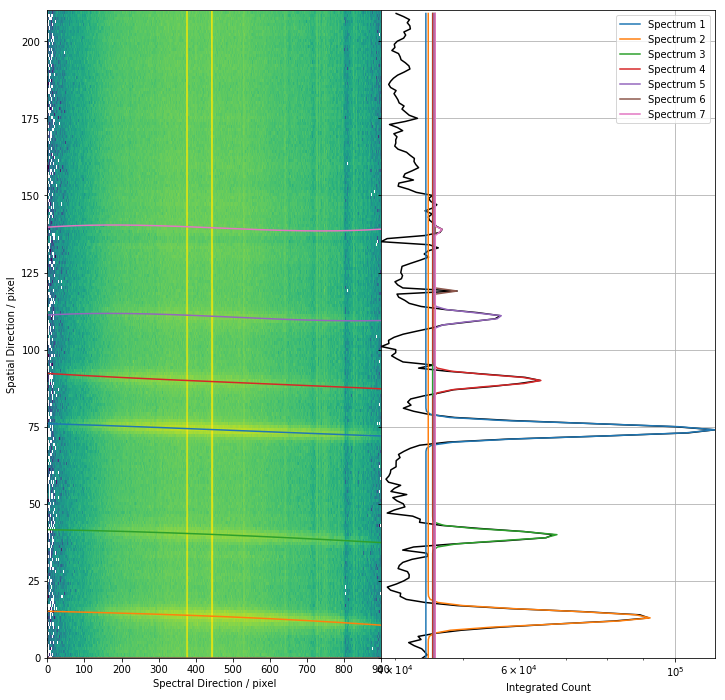

In [5]:
# (3) example of twodspec.ap_trace() with cosmic ray removal, selecting the 7 brightest spectra
#     in the pixel range covered by spatial_mask and spec_mask.
#     The 6th and 7th ones failed, error messages are printed but the code continues to run.

spatial_mask = np.arange(40,250)
spec_mask = np.arange(100,1000)

my, my_sigma = twodspec.ap_trace(sprat_data, nsteps=20, spatial_mask=spatial_mask, spec_mask=spec_mask,
                                cosmic=True, n_spec=7, recenter=False, prevtrace=(0, ), 
                                fittype='cubic', bigbox=8, Saxis=1,
                                nomessage=False, display=True)

aspired/twodspec.py:561: RuntimeWarning: invalid value encountered in log10
  min(median_trace+widthup+skysep+skywidth, len(img[0])), :]),


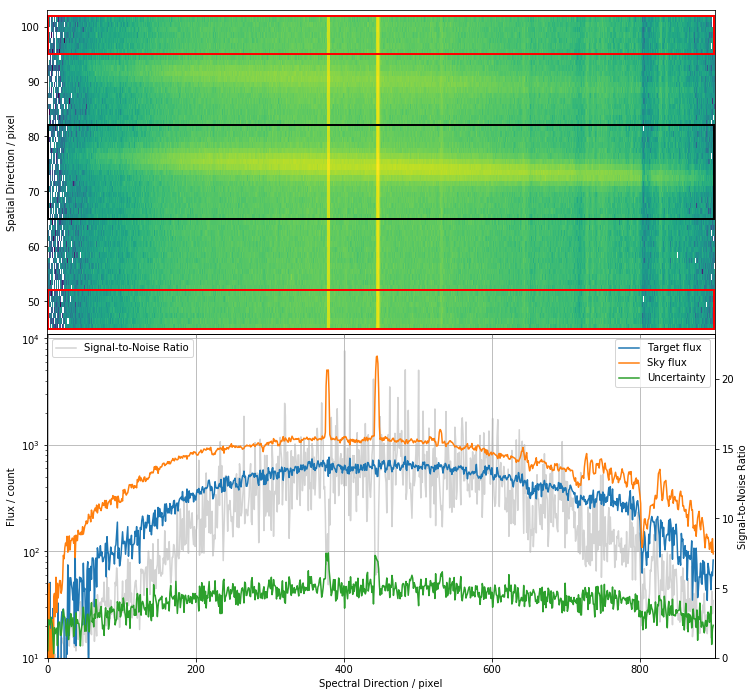

In [6]:
# (4a) (Aperature) Extracting spectrum by summing over the aperture along the trace
# my[0] is a special cases where skysep has to be increased to avoid crowding
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[0],
    my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=13,
    display=True,
    optimal=False)

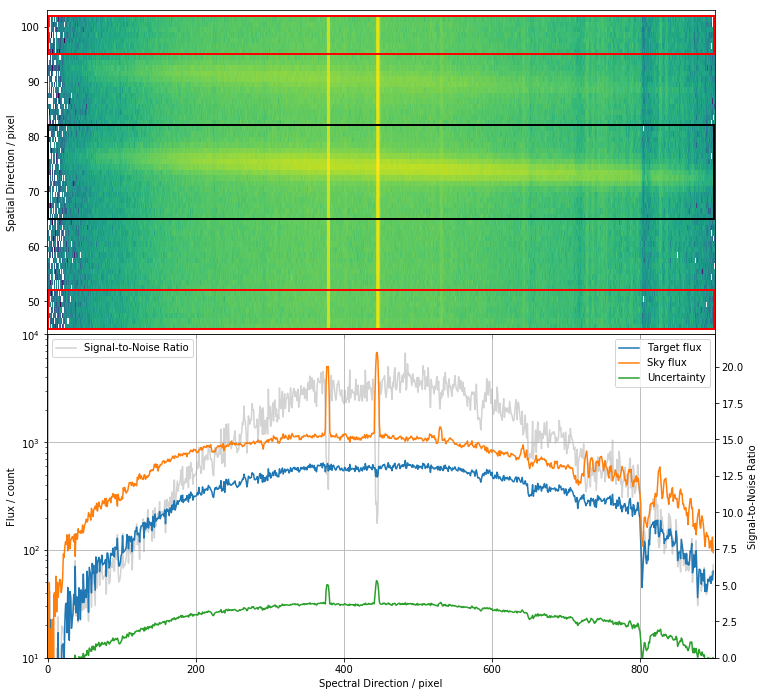

In [7]:
# (4b) (Optimal) Extracting spectrum by summing over the aperture along the trace
# my[0] is a special cases where skysep has to be increased to avoid crowding
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[0],
    my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=13,
    display=True)

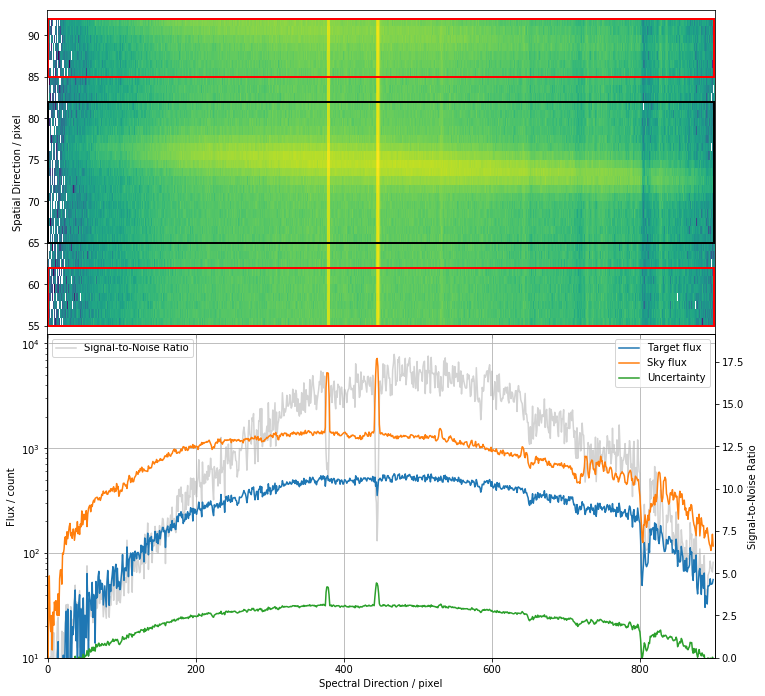

In [8]:
# Optimal my[0] with sky fit with 1st order polynomial
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[0],
    my_sigma[0],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skydeg=1,
    display=True)

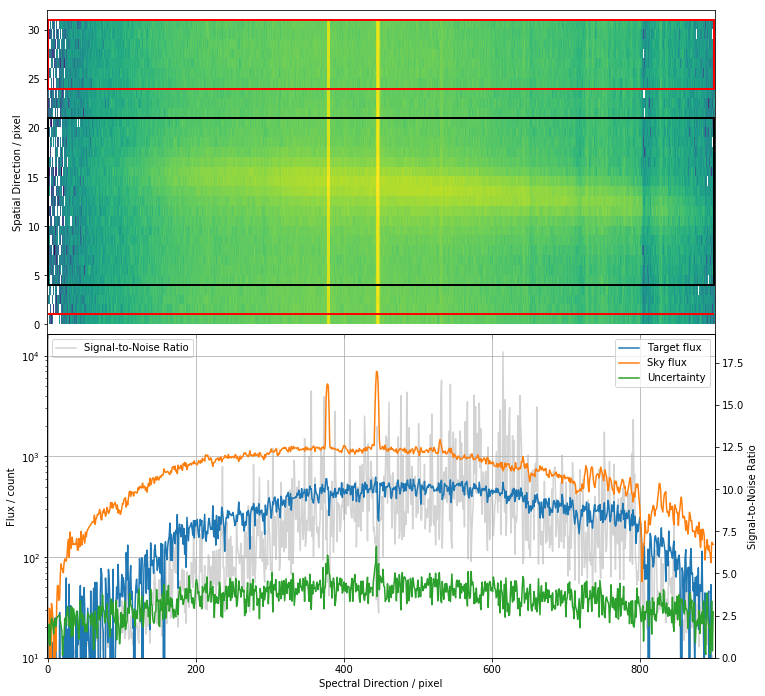

In [9]:
# my[1] is a special case where the spectrum (sky part) is close to the edge
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[1],
    my_sigma[1],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True,
    optimal=False)

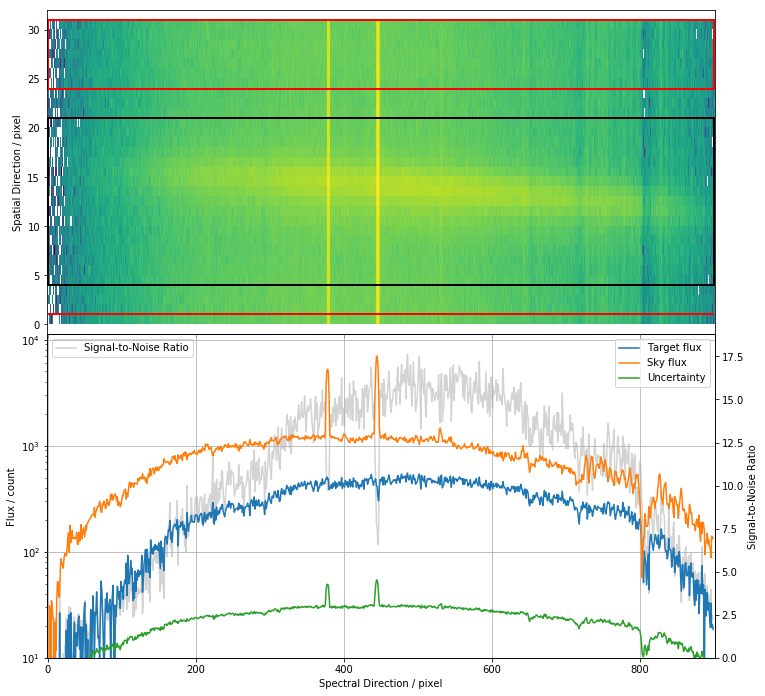

In [10]:
# Optimal my[1]
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[1],
    my_sigma[1],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True)

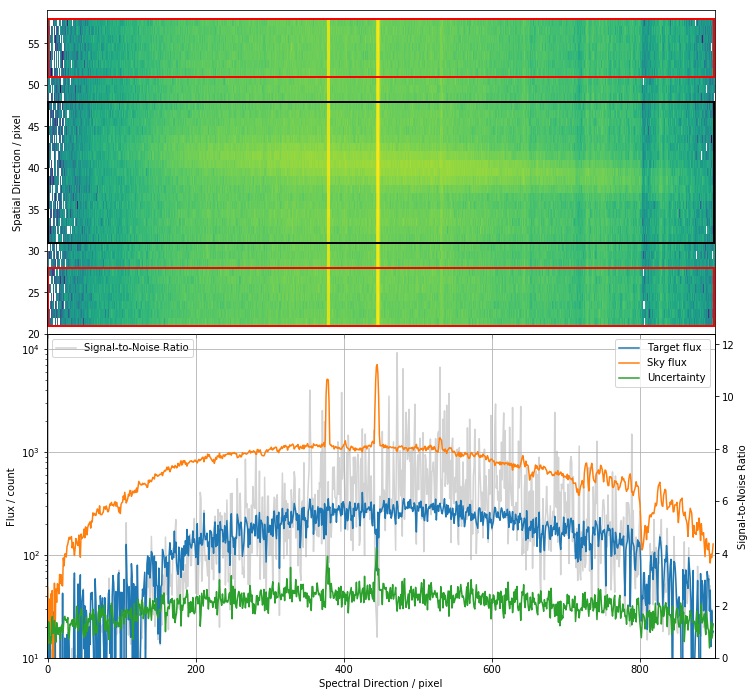

In [11]:
# my[2] is a typical case
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[2],
    my_sigma[2],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True,
    optimal=False)

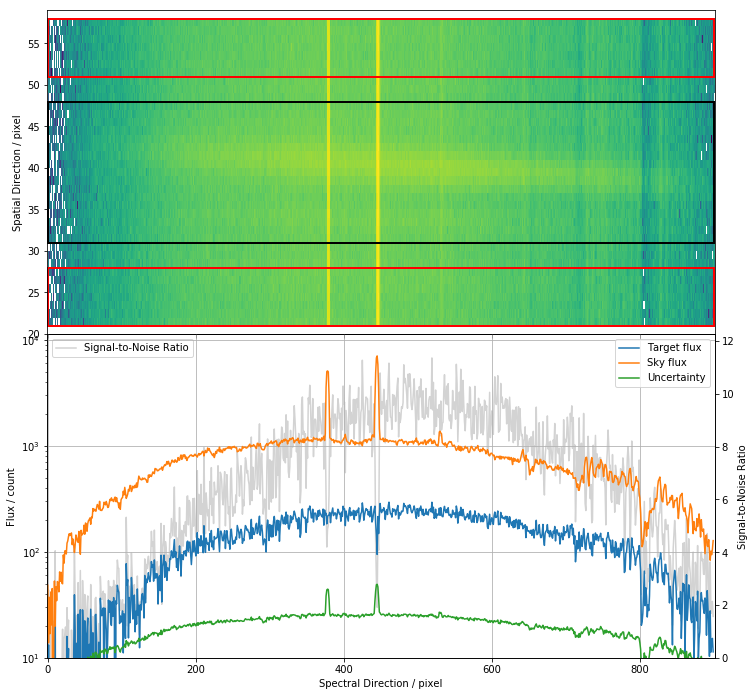

In [12]:
# Optimal my[2]
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[2],
    my_sigma[2],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True)

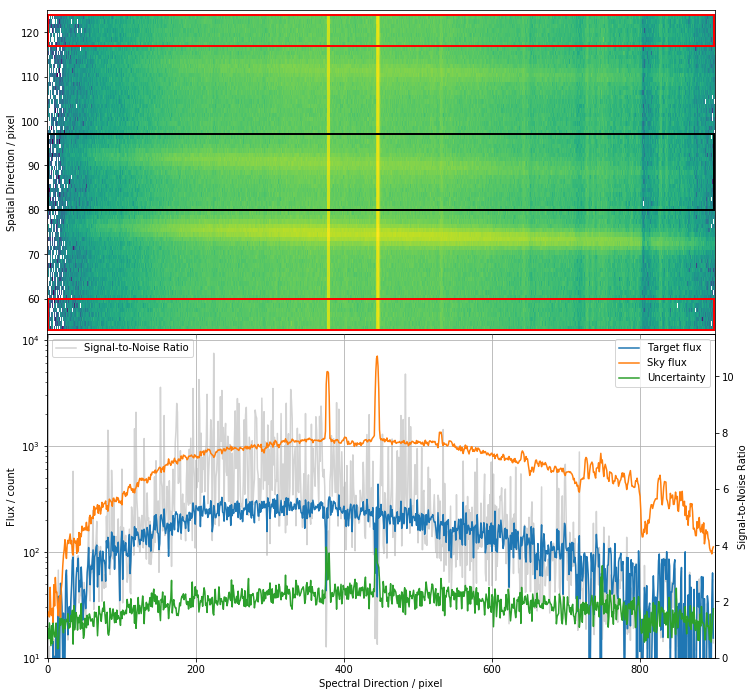

In [13]:
# my[3] is a special cases where skysep has to be increased to avoid crowding
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[3],
    my_sigma[3],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=20,
    display=True,
    optimal=False)

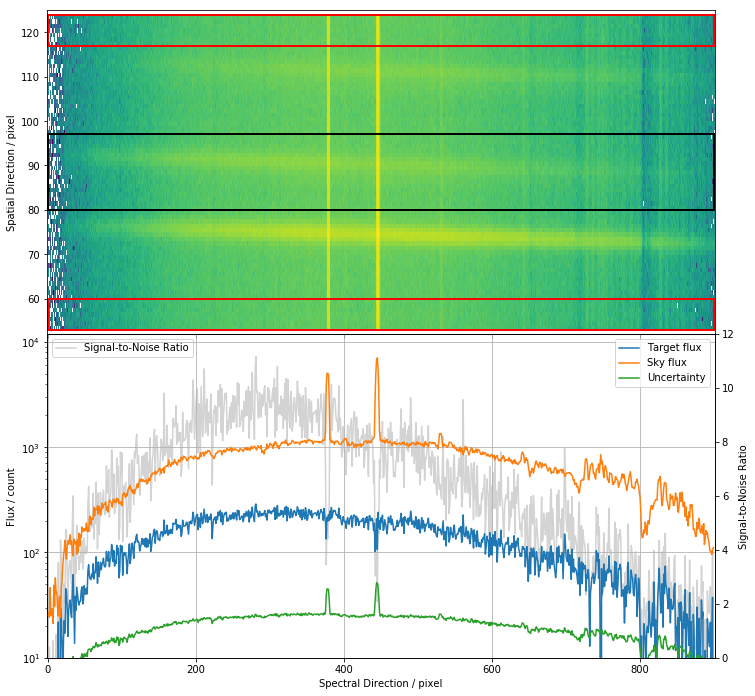

In [14]:
# Optimal my[3]
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[3],
    my_sigma[3],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    skysep=20,
    display=True)